In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("loan.csv", low_memory=False)
print(df.shape)
df.head()

(887379, 74)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### We will only take loans where

    "1. Income is verified \n",
    "2. Term is 36 months\n",
    "3. The loan was fully funded\n",
    "4. The loan was fully paid\n",
    "5. The application type was individual (not joint)\n",

In [4]:
dfnew = df[df['term']==" 36 months"]
dfnew.shape

(621125, 74)

In [5]:
dfnew=dfnew[dfnew['verification_status']!="Not Verified"]
dfnew.shape

(398278, 74)

In [6]:
dfnew=dfnew[dfnew['loan_amnt']==dfnew['funded_amnt']]
dfnew.shape

(397814, 74)

In [7]:
dfnew=dfnew[dfnew['loan_status']=="Fully Paid"]
dfnew.shape

(97558, 74)

In [8]:
dfnew=dfnew[dfnew['application_type']=="INDIVIDUAL"]
dfnew.shape

(97557, 74)

In [9]:
corr = dfnew.corr()
corr.shape

(51, 51)

<AxesSubplot:title={'center':'CORRELATION MATRIX'}>

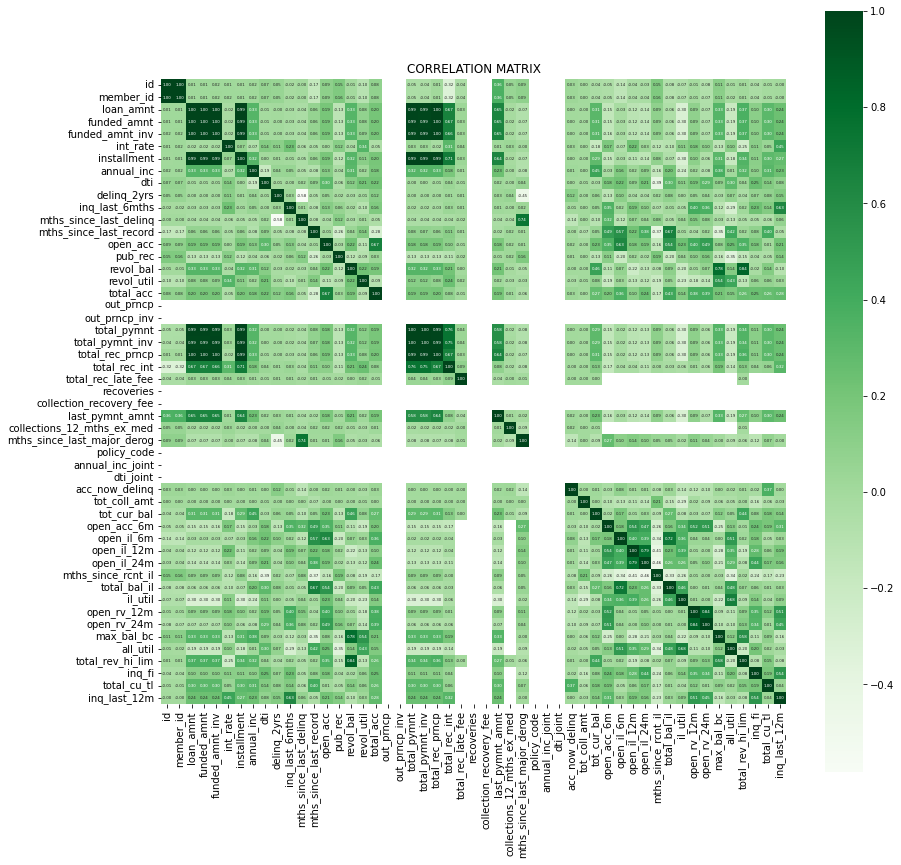

In [10]:

plt.figure(figsize=(14,14))
plt.title("CORRELATION MATRIX")
sns.heatmap(corr, cbar=True, square= True, fmt='.2f',annot=True,annot_kws={'size':4}, cmap='Greens')

In [11]:
dfnew=dfnew[['loan_amnt','int_rate','home_ownership',
             'annual_inc','issue_d','purpose','addr_state','dti','sub_grade']]
dfnew.shape

(97557, 9)

In [12]:
dfnew.head()

,loan_amnt,int_rate,home_ownership,annual_inc,issue_d,purpose,addr_state,dti,sub_grade
0,5000.0,10.65,RENT,24000.0,Dec-2011,credit_card,AZ,27.65,B2
3,10000.0,13.49,RENT,49200.0,Dec-2011,other,CA,20.00,C1
5,5000.0,7.90,RENT,36000.0,Dec-2011,wedding,AZ,11.20,A4
7,3000.0,18.64,RENT,48000.0,Dec-2011,car,CA,5.35,E1
11,12000.0,12.69,OWN,75000.0,Dec-2011,debt_consolidation,CA,10.78,B5


In [13]:
years = pd.to_datetime(dfnew.issue_d)
dfnew["year"] = years.dt.year
dfnew.drop(['issue_d'], inplace=True, axis=1)

In [14]:
dfnew = dfnew.rename(columns={"sub_grade":"grade"})
dfnew.head()

,loan_amnt,int_rate,home_ownership,annual_inc,purpose,addr_state,dti,grade,year
0,5000.0,10.65,RENT,24000.0,credit_card,AZ,27.65,B2,2011
3,10000.0,13.49,RENT,49200.0,other,CA,20.00,C1,2011
5,5000.0,7.90,RENT,36000.0,wedding,AZ,11.20,A4,2011
7,3000.0,18.64,RENT,48000.0,car,CA,5.35,E1,2011
11,12000.0,12.69,OWN,75000.0,debt_consolidation,CA,10.78,B5,2011


#### Using label encoder to convert string values to numerical

In [15]:
from sklearn.preprocessing import LabelEncoder

home_le = LabelEncoder()
dfnew['home_ownership'] = home_le.fit_transform(dfnew['home_ownership'])

purp_le = LabelEncoder()
dfnew['purpose'] = purp_le.fit_transform(dfnew['purpose'])

state_le = LabelEncoder()
dfnew['addr_state'] = state_le.fit_transform(dfnew['addr_state'])

grade_le = LabelEncoder()
dfnew['grade'] = grade_le.fit_transform(dfnew['grade'])

dfnew.head()

,loan_amnt,int_rate,home_ownership,annual_inc,purpose,addr_state,dti,grade,year
0,5000.0,10.65,5,24000.0,1,3,27.65,6,2011
3,10000.0,13.49,5,49200.0,9,4,20.00,10,2011
5,5000.0,7.90,5,36000.0,13,3,11.20,3,2011
7,3000.0,18.64,5,48000.0,0,4,5.35,20,2011
11,12000.0,12.69,4,75000.0,2,4,10.78,9,2011


<AxesSubplot:title={'center':'CORRELATION MATRIX'}>

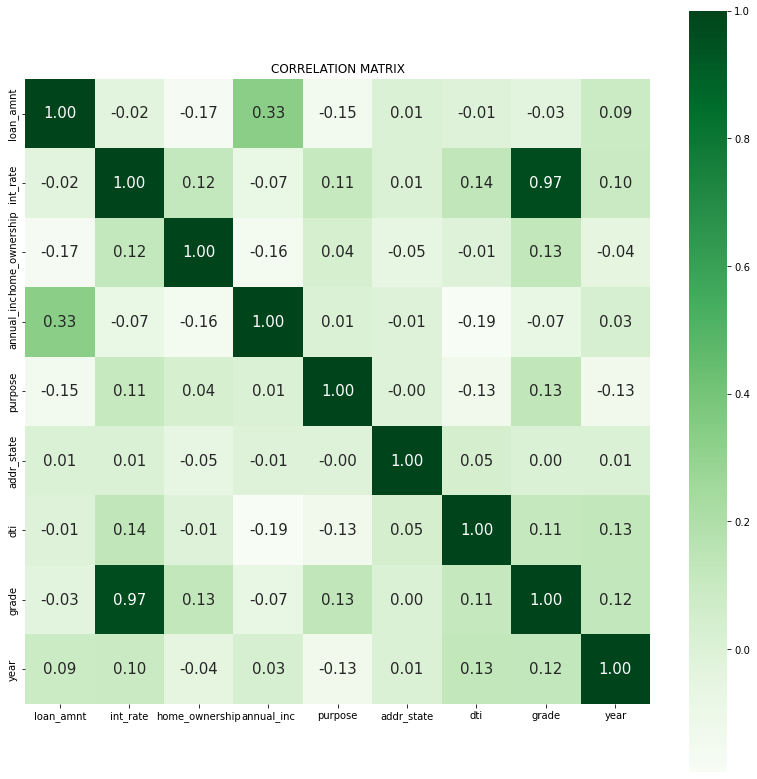

In [16]:
corr = dfnew.corr()
corr.shape
plt.figure(figsize=(14,14))
plt.title("CORRELATION MATRIX")
sns.heatmap(corr, cbar=True, square= True, fmt='.2f',annot=True,annot_kws={'size':15}, cmap='Greens')

We can see that interest rate depends highly upon grade

## Building the Model

In [17]:
from sklearn.model_selection import train_test_split

X=dfnew[['loan_amnt','grade','home_ownership','annual_inc','purpose','addr_state','dti','year']].values
y=dfnew['int_rate'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Fitting 
Number of inputs:  68289
Mean absolute error is: 
0.2827893945606122
Without outliers, mean absolute error is:  0.281151966647302
Error distribution plot:


<function print>

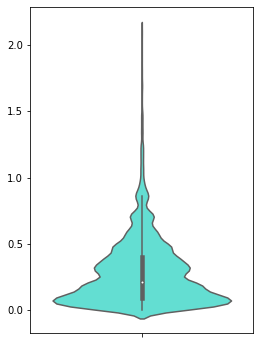

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics

algo = GradientBoostingRegressor(n_estimators=110)
print("Fitting ")
print ("Number of inputs: ",len(y_train))
model = algo.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred=np.round(y_pred,2)
print ("Mean absolute error is: ")
print(metrics.mean_absolute_error(y_test, y_pred))
print
errors = []
for i,j in zip(y_test, y_pred):
    if abs(i-j)<3:
        errors.append(abs(i-j))
print
print ("Without outliers, mean absolute error is: ", np.mean(errors))

plt.figure(figsize=(4,6))
print ("Error distribution plot:")
sns.violinplot(y=errors, color="#4ff2e2")
print

In [22]:
print ("Mean interest rate for the data is: ")
print (dfnew.int_rate.mean())

Mean interest rate for the data is: 
12.737913322468316


In [23]:
print (1-np.mean(errors)/ dfnew.int_rate.mean())

0.9779279416078785
